In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Note: training completed with small artificial dataset and testing completed with original Israeli Covid data.

In [2]:
df = pd.read_csv('SyntheticDataset.csv') # Training data
df

,Cough,Fever,Sore Throat,Shortness of Breath,Headache,Test Result,Contact with Infectious
0,1,1,0,0,0,1,1
1,0,1,0,0,1,1,0
2,1,1,0,0,0,1,1
3,1,0,0,0,0,1,1
4,0,1,1,1,1,1,1
5,1,0,0,0,0,1,0
6,0,1,0,0,0,1,0
7,1,1,0,0,1,1,1
8,1,1,0,0,0,1,1
9,1,1,1,1,1,1,0


In [3]:
df2 = pd.read_csv('FinalData.csv')
df2

,Unnamed: 0,Cough,Fever,Sore Throat,Shortness of Breath,Headache,Test Result,Contact with Infectious
0,43720,No,No,No,No,No,Negative,No
1,43721,No,No,No,No,No,Positive,No
2,43722,No,No,No,No,No,Negative,No
3,43723,No,No,No,No,No,Positive,No
4,43724,No,No,No,No,No,Positive,Yes
...,...,...,...,...,...,...,...,...
13757,57596,No,No,No,No,No,Negative,No
13758,57597,No,No,No,No,No,Negative,No
13759,57598,No,No,No,No,No,Negative,No
13760,57599,No,No,No,No,No,Negative,No


In [4]:
df2.columns = ['Delete', 'Cough', 'Fever', 'Sore Throat', 'Shortness of Breath', 'Headache', 'Test Result', 'Contact with Infectious']
del df2['Delete']

In [5]:
df = df.sample(frac = 1) # Shuffle in random order so there's a random combination of positive and negative outcomes

In [6]:
df2 = df2.iloc[:1000,:]

In [7]:
from sklearn.preprocessing import LabelEncoder
columns = ['Cough', 'Fever', 'Sore Throat', 'Shortness of Breath', 'Headache', 'Contact with Infectious', 'Test Result']
label_encoder = LabelEncoder()
for column in columns:
    df2[column] = label_encoder.fit_transform(df2[column])

/Users/luis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
training_data = df[['Cough', 'Fever', 'Sore Throat', 'Shortness of Breath', 'Headache', 'Contact with Infectious']]
training_target = df[['Test Result']]
testing_data = df2[['Cough', 'Fever', 'Sore Throat', 'Shortness of Breath', 'Headache', 'Contact with Infectious']]
testing_target = df2[['Test Result']]

In [9]:
training_data = training_data.to_numpy()
training_target = training_target.to_numpy() 
testing_data = testing_data.to_numpy()
testing_target = testing_target.to_numpy()

In [10]:
training_target.shape = (40,)
testing_target.shape = (1000,)

In [11]:
model = DecisionTreeClassifier(max_depth = 10)
model.fit(training_data, training_target)
ypred = model.predict(testing_data)
print("{0} / {1} correct".format(np.sum(testing_target == ypred), len(testing_target)))

957 / 1000 correct


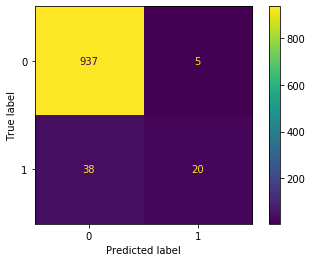

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
matrix = confusion_matrix(testing_target, ypred, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
display.plot()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(testing_target, ypred, labels=model.classes_))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       942
           1       0.80      0.34      0.48        58

    accuracy                           0.96      1000
   macro avg       0.88      0.67      0.73      1000
weighted avg       0.95      0.96      0.95      1000



In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(training_data, training_target)
ypred = model.predict(testing_data)
print("{0} / {1} correct".format(np.sum(testing_target == ypred), len(testing_target)))

953 / 1000 correct


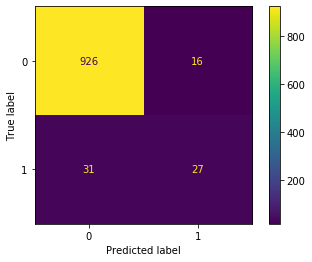

In [16]:
matrix = confusion_matrix(testing_target, ypred, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
display.plot()

In [17]:
print(classification_report(testing_target, ypred, labels=model.classes_))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       942
           1       0.63      0.47      0.53        58

    accuracy                           0.95      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.95      0.95      0.95      1000

